# MENINGKATKAN PROFITABILITAS
1. Revenue per Vehicle Type.

2. Cancel Rate Driver/Customer ( potensi revenue yang hilang).

3. customer loyalty (berapa banyak repeat order).

4. Driver performance (lewat rating & cancellation).

## Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving ncr_ride_bookings.csv to ncr_ride_bookings.csv


In [3]:
data = pd.read_csv('ncr_ride_bookings.csv')

In [4]:
pd.set_option('display.max_column', None)

In [5]:
data.sample(10)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
83841,2024-02-02,07:16:45,"""CNR1288370""",Cancelled by Driver,"""CID6115776""",Go Sedan,Shahdara,Chandni Chowk,5.4,NaN,NaN,NaN,1.0,More than permitted people in there,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35631,2024-07-08,09:13:44,"""CNR9237015""",Completed,"""CID3480210""",Go Mini,Tughlakabad,Faridabad Sector 15,2.6,38.9,NaN,NaN,NaN,NaN,NaN,NaN,402.0,7.36,3.8,4.1,Uber Wallet
62762,2024-10-24,19:39:35,"""CNR7043012""",Completed,"""CID5832465""",Go Sedan,Subhash Chowk,Noida Film City,5.8,38.3,NaN,NaN,NaN,NaN,NaN,NaN,75.0,9.07,3.9,4.3,Uber Wallet
118593,2024-11-02,11:22:08,"""CNR2557179""",Completed,"""CID4648363""",Bike,Ramesh Nagar,Noida Extension,10.6,35.6,NaN,NaN,NaN,NaN,NaN,NaN,78.0,26.99,3.9,4.0,Cash
3904,2024-05-20,15:23:07,"""CNR9045280""",Completed,"""CID3893501""",Go Sedan,Mandi House,Aya Nagar,12.9,39.5,NaN,NaN,NaN,NaN,NaN,NaN,309.0,40.28,4.4,4.6,UPI
134496,2024-04-30,08:15:31,"""CNR9964530""",No Driver Found,"""CID8268517""",Premier Sedan,Jasola,AIIMS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7275,2024-11-30,05:03:25,"""CNR8290060""",Cancelled by Driver,"""CID4795054""",Go Sedan,Huda City Centre,Tagore Garden,5.6,NaN,NaN,NaN,1.0,The customer was coughing/sick,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25705,2024-10-18,08:12:03,"""CNR8336735""",Completed,"""CID2161274""",Premier Sedan,Mayur Vihar,Chandni Chowk,13.4,27.5,NaN,NaN,NaN,NaN,NaN,NaN,414.0,49.49,3.3,5.0,Uber Wallet
114176,2024-05-28,20:16:22,"""CNR6883670""",Completed,"""CID2272778""",Go Sedan,MG Road,Shivaji Park,9.0,33.2,NaN,NaN,NaN,NaN,NaN,NaN,125.0,2.58,4.2,4.2,Uber Wallet
19494,2024-09-08,13:22:15,"""CNR1656614""",Completed,"""CID5788076""",Go Sedan,MG Road,ITO,9.1,33.2,NaN,NaN,NaN,NaN,NaN,NaN,714.0,25.85,4.1,4.3,UPI


In [6]:
data.shape

(150000, 21)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [ ]:
# data yang tipenya tidak sesuai : Date, Time, Cancelled rides by customer, Cancelled rides by driver

In [8]:
data.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


In [9]:
print (f'Nilai Duplikat :',{data.duplicated().sum() })

Nilai Duplikat : {np.int64(0)}


In [10]:
data.isnull().sum()

,0
Date,0
Time,0
Booking ID,0
Booking Status,0
Customer ID,0
Vehicle Type,0
Pickup Location,0
Drop Location,0
Avg VTAT,10500
Avg CTAT,48000


In [12]:
data ['Booking Status'].value_counts()

,count
Booking Status,
Completed,93000
Cancelled by Driver,27000
No Driver Found,10500
Cancelled by Customer,10500
Incomplete,9000


In [13]:
data['Vehicle Type'].value_counts()

,count
Vehicle Type,
Auto,37419
Go Mini,29806
Go Sedan,27141
Bike,22517
Premier Sedan,18111
eBike,10557
Uber XL,4449


## Data Cleaning & Prepocessing

In [11]:
data.groupby("Booking Status")[["Avg VTAT","Avg CTAT"]].count()


,Avg VTAT,Avg CTAT
Booking Status,,
Cancelled by Customer,10500,0
Cancelled by Driver,27000,0
Completed,93000,93000
Incomplete,9000,9000
No Driver Found,0,0


In [14]:
data_imputed = data.copy()

In [15]:
# Imputasi CTAT
for vt, subset in data_imputed[data_imputed["Booking Status"].isin(["Completed", "Incomplete"])].groupby("Vehicle Type"):
    mean_ctat = subset["Avg CTAT"].mean()
    mask = (data_imputed["Vehicle Type"]==vt) & \
           (data_imputed["Booking Status"].isin(["Completed","Incomplete"])) & \
           (data_imputed["Avg CTAT"].isna())
    data_imputed.loc[mask, "Avg CTAT"] = mean_ctat


# Imputasi VTAT
for vt, subset in data_imputed[data_imputed["Booking Status"]!="No Driver Found"].groupby("Vehicle Type"):
    mean_vtat = subset["Avg VTAT"].mean()
    mask = (data_imputed["Vehicle Type"]==vt) & \
           (data_imputed["Booking Status"]!="No Driver Found") & \
           (data_imputed["Avg VTAT"].isna())
    data_imputed.loc[mask, "Avg VTAT"] = mean_vtat


# Cek hasil
print("Missing CTAT setelah imputasi:", data_imputed["Avg CTAT"].isna().sum())
print("Missing VTAT setelah imputasi:", data_imputed["Avg VTAT"].isna().sum())
print(data_imputed.groupby("Booking Status")[["Avg VTAT","Avg CTAT"]].apply(lambda x: x.isna().sum()))


Missing CTAT setelah imputasi: 48000
Missing VTAT setelah imputasi: 10500
                       Avg VTAT  Avg CTAT
Booking Status                           
Cancelled by Customer         0     10500
Cancelled by Driver           0     27000
Completed                     0         0
Incomplete                    0         0
No Driver Found           10500     10500


In [ ]:
#CTAT (trip duration)
# 1. Valid hanya untuk Completed & Incomplete.
# 2. Untuk status lain → biarkan NaN.
# 3. Isi missing dengan mean per Vehicle Type.

#VTAT (driver arrival to pickup)
# 1. Valid untuk semua status kecuali No Driver Found.
# 2. Untuk No Driver Found → biarkan NaN.
# 3. Isi missing dengan mean per Vehicle Type.

#Setelah imputasi, semua nilai CTAT dan VTAT yang relevan sudah terisi dengan rata-rata per vehicle type. Sisa missing value hanya muncul di booking status yang memang tidak relevan (misalnya Cancelled dan No Driver Found), sehingga ini bukan masalah kualitas data.

# Pada dataset terdapat missing value yang cukup besar pada dua kolom waktu perjalanan, yaitu CTAT (Average trip duration) dan VTAT (Average vehicle time to arrival). Total missing value adalah 48.000 baris pada CTAT dan 10.500 baris pada VTAT dari 150.000 baris data.

#Setelah dianalisis berdasarkan Booking Status, ditemukan bahwa:

#CTAT hanya tercatat pada perjalanan yang Completed dan Incomplete, karena hanya pada kondisi tersebut perjalanan benar-benar dijalankan. Untuk status Cancelled dan No Driver Found, CTAT memang tidak relevan sehingga dibiarkan kosong.

#VTAT tercatat pada semua status kecuali No Driver Found, karena jika tidak ada driver yang ditugaskan maka tidak ada waktu tempuh ke lokasi pickup yang bisa diukur.

#Strategi imputasi dilakukan dengan mengisi missing value pada kondisi yang relevan menggunakan mean per Vehicle Type, sehingga variasi antar jenis kendaraan tetap terjaga. Setelah imputasi, sisa missing value hanya terdapat pada status yang memang tidak relevan untuk CTAT dan VTAT (misalnya Cancelled dan No Driver Found). Dengan demikian, masalah missing value dapat dianggap selesai tanpa mengganggu kualitas data.

In [ ]:
# Kolom AVG CTAT dan VTAT disesuaikan dengan booking status dimana hanya yang Complete yang memiliki nilai dan sisanya NaN value

In [16]:
data_imputed.isnull().sum()

,0
Date,0
Time,0
Booking ID,0
Booking Status,0
Customer ID,0
Vehicle Type,0
Pickup Location,0
Drop Location,0
Avg VTAT,10500
Avg CTAT,48000


In [ ]:
# Setelah di imputasi ternnyata missing valuenya masih sama sehingga asumsinya bahwa datanya sudah valid tanpa harus di imputasi

In [25]:
data_time = data_imputed.copy()

In [26]:
# Mebuat kolom baru hasil gabungan kolom Date dan Time
data_time ['Times'] = data_time['Date']+ ' ' + data_time['Time']
data_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [27]:
kolom_baru = ['Times']

In [28]:
# Menempatkan Kolom Times dibagian depan tabel
kolom_lama = [col for col in data_time.columns if col not in kolom_baru]
urutan_kolom_terbaru = kolom_baru + kolom_lama
data_time = data_time[urutan_kolom_terbaru]
data_time.head()

,Times,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23 12:29:38,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29 18:01:39,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,NaN,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23 08:56:10,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,NaN,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21 17:17:25,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,NaN,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16 22:08:00,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,NaN,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [29]:
#mengahpus kolom Time dan Date
data_time = data_time.drop(columns = ['Date', 'Time'])
data_time.head()

,Times,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23 12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29 18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,NaN,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23 08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,NaN,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21 17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,NaN,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16 22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,NaN,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [30]:
# mengganti nama kolom Times menjadi Time
data_time = data_time.rename(columns = {'Times' : 'Time'})
data_time.sample(5)

,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
74073,2024-05-10 09:00:58,"""CNR7361682""",Completed,"""CID1515623""",Auto,Ramesh Nagar,Narsinghpur,3.0,39.6,NaN,NaN,NaN,NaN,NaN,NaN,493.0,47.99,4.3,4.9,Cash
70000,2024-03-11 11:49:47,"""CNR9593980""",Completed,"""CID8040340""",Auto,Madipur,Nawada,5.0,42.7,NaN,NaN,NaN,NaN,NaN,NaN,247.0,26.43,3.9,4.1,UPI
19990,2024-08-08 01:22:53,"""CNR1730630""",Cancelled by Customer,"""CID1209911""",Go Mini,Gwal Pahari,Meerut,19.2,NaN,1.0,Wrong Address,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84658,2024-04-08 21:41:41,"""CNR3350852""",No Driver Found,"""CID5856917""",Go Sedan,Maidan Garhi,Okhla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42926,2024-12-01 18:37:18,"""CNR7628446""",No Driver Found,"""CID4695381""",Bike,Sarojini Nagar,Kanhaiya Nagar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# mengganti tipe data Time menjadi datetime
data_time ['Time'] = pd.to_datetime(data_time['Time'])
data_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 20 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Time                               150000 non-null  datetime64[ns]
 1   Booking ID                         150000 non-null  object        
 2   Booking Status                     150000 non-null  object        
 3   Customer ID                        150000 non-null  object        
 4   Vehicle Type                       150000 non-null  object        
 5   Pickup Location                    150000 non-null  object        
 6   Drop Location                      150000 non-null  object        
 7   Avg VTAT                           139500 non-null  float64       
 8   Avg CTAT                           102000 non-null  float64       
 9   Cancelled Rides by Customer        10500 non-null   float64       
 10  Reason for cancellin

In [32]:
# mengganti type data ke int
cols = ["Cancelled Rides by Customer", "Cancelled Rides by Driver", "Incomplete Rides"]
data_time[cols] = data_time[cols].fillna(0).astype(int)
data_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 20 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Time                               150000 non-null  datetime64[ns]
 1   Booking ID                         150000 non-null  object        
 2   Booking Status                     150000 non-null  object        
 3   Customer ID                        150000 non-null  object        
 4   Vehicle Type                       150000 non-null  object        
 5   Pickup Location                    150000 non-null  object        
 6   Drop Location                      150000 non-null  object        
 7   Avg VTAT                           139500 non-null  float64       
 8   Avg CTAT                           102000 non-null  float64       
 9   Cancelled Rides by Customer        150000 non-null  int64         
 10  Reason for cancellin

## Data Visualization

In [33]:
df = data_time.copy()

### Revenue per Vehicle Type

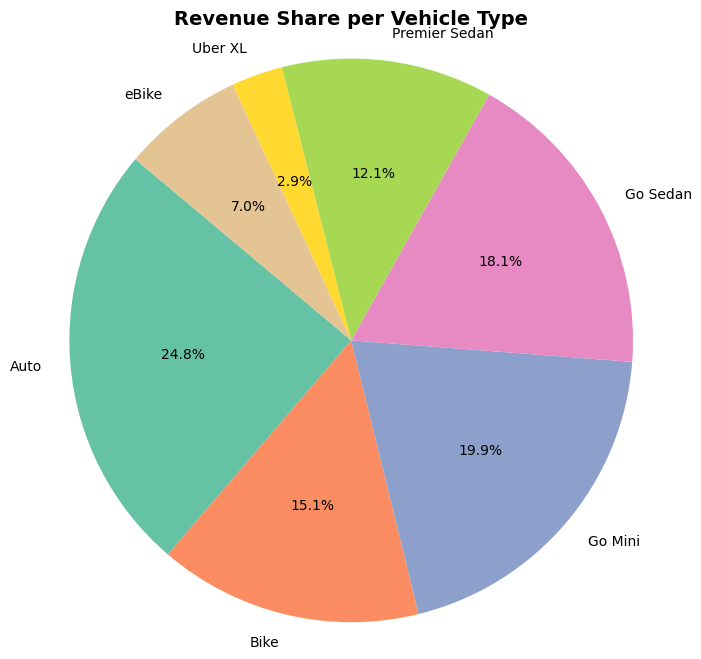

In [34]:
# Hitung revenue per vehicle type
revenue_per_vehicle = df.groupby("Vehicle Type")["Booking Value"].sum().reset_index()

# Pie Chart
plt.figure(figsize=(8,8))
plt.pie(
    revenue_per_vehicle["Booking Value"],
    labels=revenue_per_vehicle["Vehicle Type"],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("Set2")
)

plt.title("Revenue Share per Vehicle Type", fontsize=14, fontweight="bold")
plt.axis("equal")  # supaya bulat
plt.show()


/tmp/ipython-input-3993128900.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


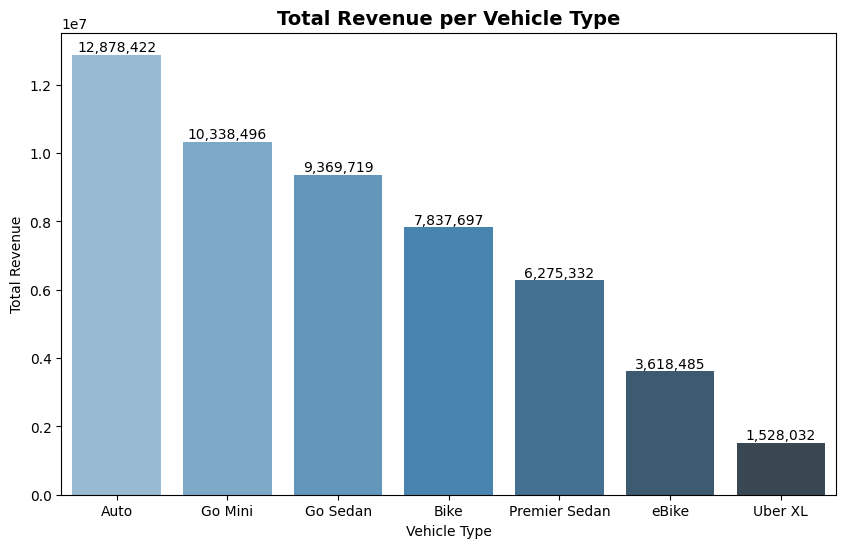

In [35]:
# hitung total revenue per vehicle type
revenue_per_vehicle = df.groupby("Vehicle Type")["Booking Value"].sum().reset_index()

# sort biar lebih rapi
revenue_per_vehicle = revenue_per_vehicle.sort_values("Booking Value", ascending=False)

# plot
plt.figure(figsize=(10,6))
sns.barplot(
    data=revenue_per_vehicle,
    x="Vehicle Type",
    y="Booking Value",
    palette="Blues_d"
)

# judul & label
plt.title("Total Revenue per Vehicle Type", fontsize=14, fontweight="bold")
plt.xlabel("Vehicle Type")
plt.ylabel("Total Revenue")

# tampilkan angka di atas bar
for i, v in enumerate(revenue_per_vehicle["Booking Value"]):
    plt.text(i, v, f"{v:,.0f}", ha="center", va="bottom", fontsize=10, color="black")

plt.show()


/tmp/ipython-input-1216126136.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=booking_per_vehicle, x="Vehicle Type", y="Booking ID", palette="Greens_d")


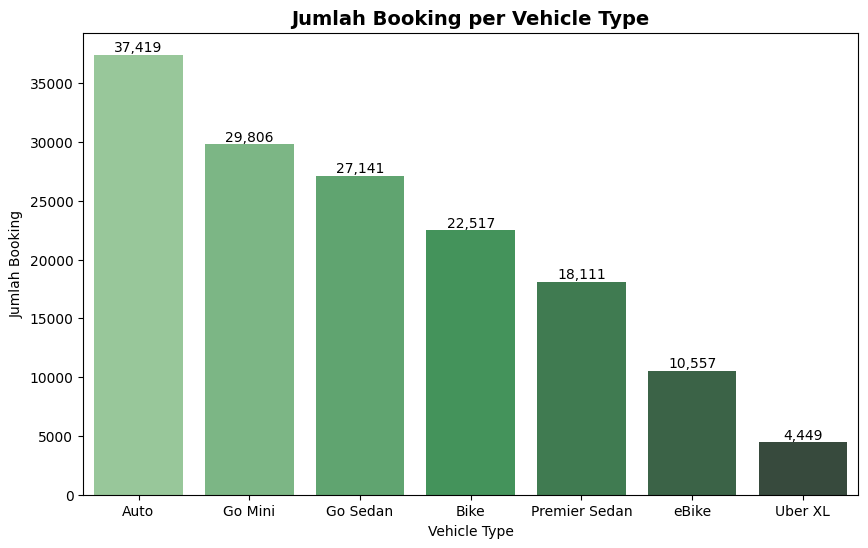

In [36]:
# 1. Jumlah booking per tipe kendaraan
booking_per_vehicle = df.groupby("Vehicle Type")["Booking ID"].count().reset_index()
booking_per_vehicle = booking_per_vehicle.sort_values("Booking ID", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=booking_per_vehicle, x="Vehicle Type", y="Booking ID", palette="Greens_d")
plt.title("Jumlah Booking per Vehicle Type", fontsize=14, fontweight="bold")
plt.xlabel("Vehicle Type")
plt.ylabel("Jumlah Booking")

# Tambahkan angka di atas bar
for i, v in enumerate(booking_per_vehicle["Booking ID"]):
    plt.text(i, v, f"{v:,}", ha="center", va="bottom", fontsize=10, color="black")

plt.show()


In [ ]:
# Tidak ada anomali (misalnya booking sedikit tapi revenue tinggi), sehingga harga rata-rata per trip antar tipe kendaraan relatif konsisten.
# Pertumbuhan revenue bisa dicapai dengan meningkatkan jumlah booking, bukan sekadar menaikkan tarif.
# Jika di tipe-tipe kendaraan revenue besar ini supply driver kurang, bisa terjadi lost revenue, jadi prioritasnya rekrut lebih banyak driver, berikan insentif, dan jaga customer experience.

### Cancellation

/tmp/ipython-input-3268123090.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


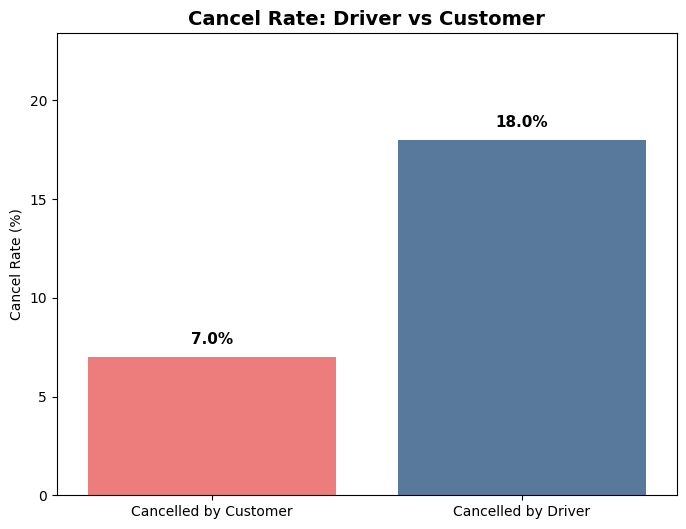

In [37]:
# hitung cancel rate berdasarkan status
cancel_summary = (
    df[df["Booking Status"].isin(["Cancelled by Customer", "Cancelled by Driver"])]
    .groupby("Booking Status")
    .agg({"Booking ID":"count"})
    .reset_index()
)

# total booking untuk hitung persen
total_booking = df["Booking ID"].count()
cancel_summary["Cancel Rate"] = cancel_summary["Booking ID"] / total_booking * 100

# barplot
plt.figure(figsize=(8,6))
ax = sns.barplot(
    data=cancel_summary,
    x="Booking Status",
    y="Cancel Rate",
    palette=["#FF6B6B","#4E79A7"]
)

plt.title("Cancel Rate: Driver vs Customer", fontsize=14, fontweight="bold")
plt.ylabel("Cancel Rate (%)")
plt.xlabel("")

# tampilkan persentase di atas bar
for i, row in cancel_summary.iterrows():
    ax.text(
        i, row["Cancel Rate"] + 0.5,
        f"{row['Cancel Rate']:.1f}%",
        ha="center", va="bottom", fontsize=11, color="black", fontweight="bold"
    )

# tambah ruang atas agar label tidak ketutup
plt.ylim(0, cancel_summary["Cancel Rate"].max() * 1.3)

plt.show()


In [38]:
df['Driver Cancellation Reason'].value_counts()

,count
Driver Cancellation Reason,
Customer related issue,6837
The customer was coughing/sick,6751
Personal & Car related issues,6726
More than permitted people in there,6686


In [39]:
df['Reason for cancelling by Customer'].value_counts()

,count
Reason for cancelling by Customer,
Wrong Address,2362
Change of plans,2353
Driver is not moving towards pickup location,2335
Driver asked to cancel,2295
AC is not working,1155


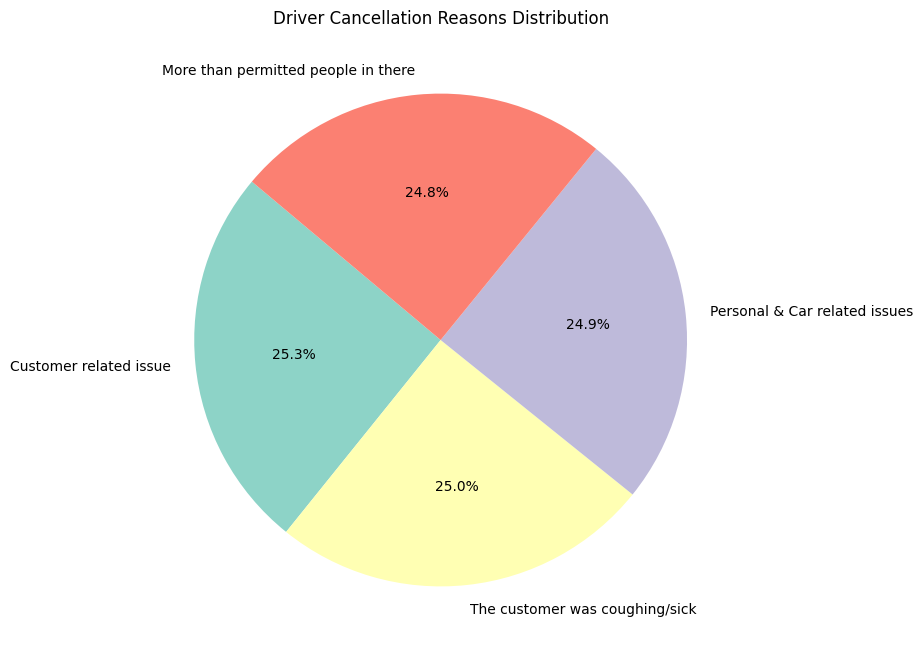

In [40]:
# hitung jumlah per alasan driver
driver_cancel_reason = df["Driver Cancellation Reason"].value_counts()

# plot pie chart
plt.figure(figsize=(8,8))
plt.pie(driver_cancel_reason,
        labels=driver_cancel_reason.index,
        autopct="%1.1f%%",
        startangle=140,
        colors=plt.cm.Set3.colors)

plt.title("Driver Cancellation Reasons Distribution")
plt.show()


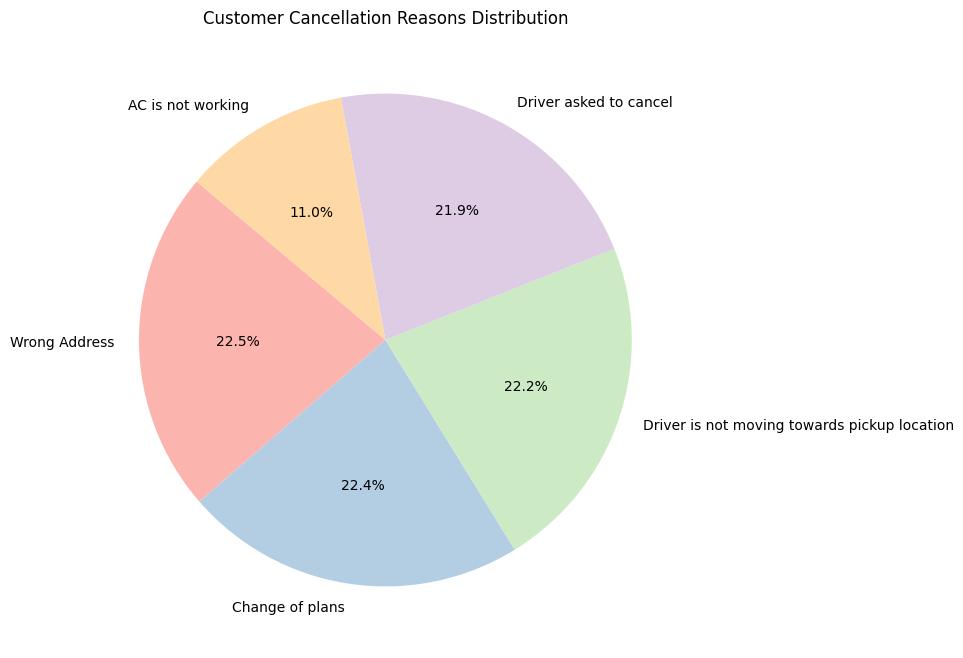

In [41]:
# hitung jumlah per alasan customer
cust_cancel_reason = df["Reason for cancelling by Customer"].value_counts()

# plot pie chart
plt.figure(figsize=(8,8))
plt.pie(
    cust_cancel_reason,
    labels=cust_cancel_reason.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=plt.cm.Pastel1.colors
)

plt.title("Customer Cancellation Reasons Distribution")
plt.show()


In [ ]:
# Driver: cancel tinggi (18%) → mayoritas karena masalah dengan customer (misalnya jumlah penumpang berlebih, customer sakit, customer issue lain).
# ada gap antara regulasi perusahaan & perilaku customer di lapangan. Perlu pengkajian ulang terkait regulasi dengan customer dilapangan, intervensi rekrutmen, training, dan monitoring.

# Customer: cancel lebih rendah (7%) → tapi alasan mereka banyak terkait layanan (misalnya driver tidak bergerak, AC rusak). Ini menarik, karena meski pembatalan tercatat oleh customer, akar masalahnya masih terkait perilaku driver.
# Potensi revenue hilang sangat besar, karena banyak order gagal diproses di sisi supply.
# Customer yang sering dibatalkan berisiko churn → pindah ke kompetitor.

### Loyalitas pelanggan

/tmp/ipython-input-1461521751.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loyalty_dist.index, y=loyalty_dist.values, palette="viridis")


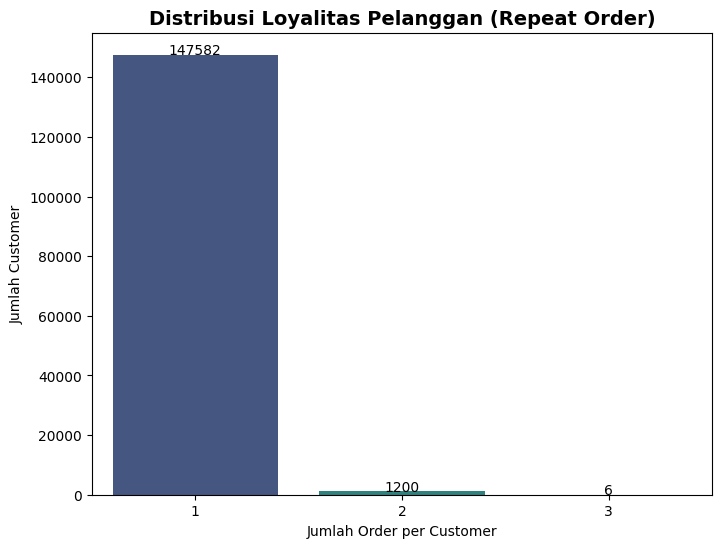

In [42]:
# hitung jumlah booking per customer
customer_loyalty = df.groupby("Customer ID")["Booking ID"].count().reset_index()
customer_loyalty.columns = ["Customer ID", "Total Bookings"]

# distribusi repeat order
loyalty_dist = customer_loyalty["Total Bookings"].value_counts().sort_index()

plt.figure(figsize=(8,6))
sns.barplot(x=loyalty_dist.index, y=loyalty_dist.values, palette="viridis")

plt.title("Distribusi Loyalitas Pelanggan (Repeat Order)", fontsize=14, fontweight="bold")
plt.xlabel("Jumlah Order per Customer")
plt.ylabel("Jumlah Customer")

# tampilkan angka di atas bar
for i, v in enumerate(loyalty_dist.values):
    plt.text(i, v + 50, str(v), ha="center", fontsize=10, color="black")

plt.show()


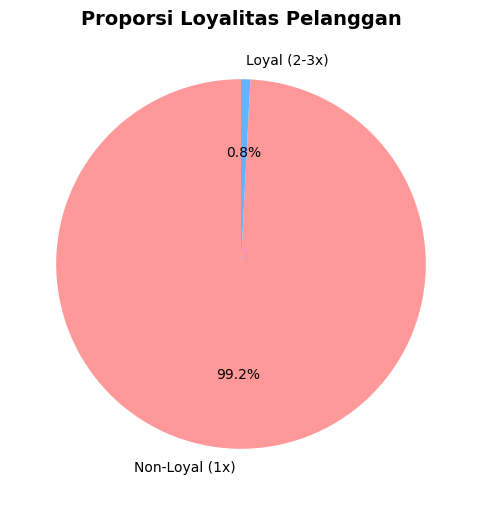

In [43]:
# kelompokkan loyal vs non-loyal
loyalty_dist_grouped = customer_loyalty["Total Bookings"].apply(lambda x: "Non-Loyal (1x)" if x==1 else "Loyal (2-3x)").value_counts()

plt.figure(figsize=(6,6))
plt.pie(loyalty_dist_grouped, labels=loyalty_dist_grouped.index, autopct="%.1f%%", startangle=90, colors=["#FF9999","#66B2FF"])
plt.title("Proporsi Loyalitas Pelanggan", fontsize=14, fontweight="bold")
plt.show()


In [ ]:
# Mayoritas pelanggan hanya 1x order, berarti retention rendah → perlu strategi promosi & loyalty program.

### Performa driver

/tmp/ipython-input-524761215.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_completed["Rating Bucket"] = pd.cut(
/tmp/ipython-input-524761215.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_dist.index, y=rating_dist.values, palette="Blues")


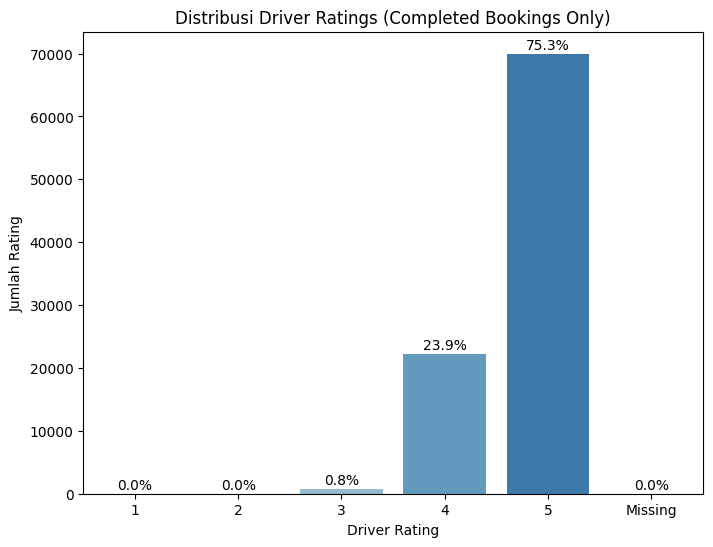

In [44]:
# Filter hanya booking yang completed
df_completed = df[df["Booking Status"] == "Completed"]

# Bins untuk rating 1–5
bins = [0,1,2,3,4,5]
labels = ["1","2","3","4","5"]

df_completed["Rating Bucket"] = pd.cut(
    df_completed["Driver Ratings"], bins=bins, labels=labels, right=True
)

# Hitung distribusi (termasuk missing jika masih ada di completed)
rating_dist = df_completed["Rating Bucket"].value_counts(dropna=False).reindex(labels + [np.nan], fill_value=0)

# Ubah NaN jadi "Missing"
rating_dist.index = rating_dist.index.astype(str).str.replace("nan","Missing")

# Hitung persentase
rating_percent = (rating_dist / rating_dist.sum() * 100).round(1)

# Plot bar chart
plt.figure(figsize=(8,6))
sns.barplot(x=rating_dist.index, y=rating_dist.values, palette="Blues")

# Tambahkan persentase di atas batang
for i, (val, pct) in enumerate(zip(rating_dist.values, rating_percent.values)):
    plt.text(i, val + 200, f"{pct}%", ha="center", va="bottom", fontsize=10, color="black")

plt.title("Distribusi Driver Ratings (Completed Bookings Only)")
plt.xlabel("Driver Rating")
plt.ylabel("Jumlah Rating")
plt.show()


In [ ]:
# Kinerja driver secara umum sangat baik (lebih dari 99% rating ≥4).
# Tidak ada bukti pelanggan memberi rating buruk (1–2).
# Tidak ada pelanggan yang tidak memberi rating.
# Walaupun kualitas perjalanan bagus, hanya 62% booking yang benar-benar completed (93.000 dari 150.000).
# Fokus strategi: jangan hanya meningkatkan customer experience di dalam perjalanan, tapi juga reliability supply sebelum perjalanan dimulai.

# KEY INSIGHTS

## Revenue per Vehicle Type
- Revenue sangat dipengaruhi oleh jumlah booking, bukan tarif per trip. Artinya untuk meningkatkan profit, perusahaan perlu meningkatkan jumlah booking pada tipe kendaraan yang populer.
- Tipe kendaraan dengan booking & revenue kecil perlu dievaluasi, karena kontribusinya rendah terhadap total pendapatan. Evaluasinya diperlukan untuk mengetahui apakah permintaan memang kecil, atau ada hambatan seperti harga, ketersediaan, atau promosi yang kurang.

## Cancel rate driver/Customer
- Saat ini cancel rate total kita mencapai 25%, dengan porsi terbesar 18% berasal dari pembatalan driver. Ini berarti potensi revenue yang hilang sebagian besar dipicu oleh faktor supply. Jika tidak dikendalikan, hal ini akan menurunkan kepuasan pelanggan dan membuka peluang bagi kompetitor. Sementara itu, pembatalan dari customer (7%) lebih terkait pada user experience. Namun driver behavior mendominasi baik secara langsung (cancel driver) maupun tidak langsung (customer cancel karena driver).

## Customer Loyalty
- Mayoritas pelanggan hanya 1x order, berarti retention rendah → perlu strategi promosi & loyalty program.

## Driver performance
- Customer puas dengan pengalaman perjalanan (rating 5 & 4 dominan), namun masalah utama justru ada sebelum perjalanan dimulai, yaitu tingginya pembatalan oleh driver. Ini menunjukkan kualitas layanan bagus saat ride berjalan, tapi reliability di tahap awal (acceptance & komitmen driver) masih lemah. Jika gap ini bisa ditutup, potensi revenue & loyalitas customer bisa naik signifikan.